# WTI CRUDE OIL PREDICTOR


In [586]:
## Import Numpy, Pandas, Matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import os
import matplotlib.dates as mdates

# Import Logistic Regression, Naive Bayes, Support Vector Machine, Decision Tree, and Random Forest, Ridge class
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Import performance metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

# Import KMeans library
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ## libraries for ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [587]:
## load my dataset
crude = 'crude.csv'
df = pd.read_csv(crude)
df.head(5)

,Date,opec,SA,us_prod,russia,Libya,Nigeria,Venezuela,Elec Kwh per capita,rig_count,...,VIX,copper,DXY,eurusd,Nasdaq,Real Gross Domestic Product,US Non Mfg ISM,us_yield_curve,us_cons_conf,WTI
0,01/11/2023,NaN,NaN,13.21,10.62,1.15,1.31,0.73,30.5,NaN,...,14.43,3.6292,105.87,1.0671,15187.90,22589,51.8,-0.410,96.45,1
1,01/10/2023,27.77,9.00,13.20,10.57,1.16,1.29,0.73,30.5,NaN,...,18.14,3.6490,106.66,1.0576,14409.78,22568,53.6,-0.157,102.60,0
2,01/09/2023,27.84,9.20,13.20,10.57,1.16,1.20,0.76,36.0,NaN,...,17.52,3.7375,106.22,1.0570,14715.24,22550,54.5,-0.473,103.00,1
3,01/08/2023,27.20,8.70,13.05,10.54,1.13,1.13,0.79,38.8,521.0,...,13.57,3.8220,103.62,1.0841,15501.07,22500,52.7,-0.757,106.10,1
4,01/07/2023,27.47,9.17,12.96,10.62,1.15,1.25,0.76,38.2,534.0,...,13.63,4.0080,101.86,1.0993,15757.00,22430,53.9,-0.918,117.00,1


In [588]:
df.shape

(251, 37)

In [589]:
df.columns

Index(['Date', 'opec', 'SA', 'us_prod', 'russia', 'Libya', 'Nigeria',
       'Venezuela', 'Elec Kwh per capita', 'rig_count', 'us_inventories',
       'days_of_supply', 'World Inventory Net With', 'oecd_inv', 'cot_ave',
       'timespread', 'U.S. Heating Degree Days', 'gpr_index', 'Europe',
       'china', 'Japan', 'india', 'World cons', 'us_oil_cons', 'oecd_cons',
       'baltic', 'OVX', 'VIX', 'copper', 'DXY', 'eurusd', 'Nasdaq',
       'Real Gross Domestic Product', 'US Non Mfg ISM', 'us_yield_curve',
       'us_cons_conf', 'WTI'],
      dtype='object')

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         251 non-null    object 
 1   opec                         250 non-null    float64
 2   SA                           250 non-null    float64
 3   us_prod                      251 non-null    float64
 4   russia                       251 non-null    float64
 5   Libya                        251 non-null    float64
 6   Nigeria                      251 non-null    float64
 7   Venezuela                    251 non-null    float64
 8   Elec Kwh per capita          251 non-null    float64
 9   rig_count                    248 non-null    float64
 10  us_inventories               248 non-null    float64
 11  days_of_supply               251 non-null    float64
 12  World Inventory Net With     251 non-null    float64
 13  oecd_inv            

In [591]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Column {column} is of type {df[column].dtype}")

Column Date is of type object


In [592]:
# df.describe()

Check for missing values

In [593]:
# # check for nulls
df.isnull().sum()

Date                           0
opec                           1
SA                             1
us_prod                        0
russia                         0
Libya                          0
Nigeria                        0
Venezuela                      0
Elec Kwh per capita            0
rig_count                      3
us_inventories                 3
days_of_supply                 0
World Inventory Net With       0
oecd_inv                       0
cot_ave                        0
timespread                     1
U.S. Heating Degree Days       0
gpr_index                      0
Europe                         0
china                          0
Japan                          0
india                          0
World cons                     0
us_oil_cons                    0
oecd_cons                      0
baltic                         0
OVX                            0
VIX                            0
copper                         0
DXY                            0
eurusd    

In [594]:
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values > 0:
        print(f"The variable {column} has {missing_values} missing values")


The variable opec has 1 missing values
The variable SA has 1 missing values
The variable rig_count has 3 missing values
The variable us_inventories has 3 missing values
The variable timespread has 1 missing values


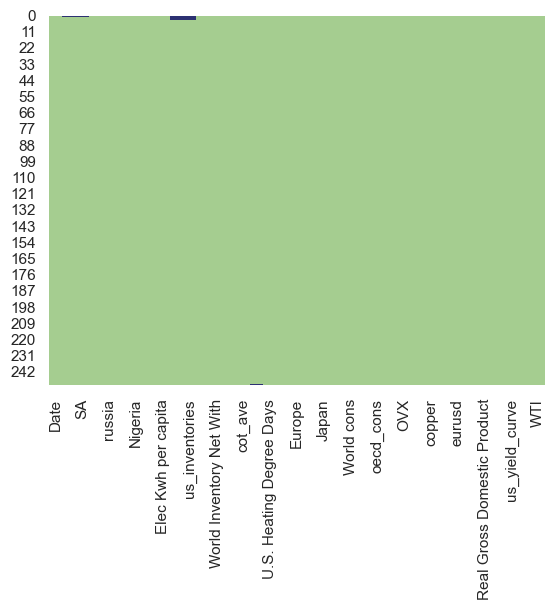

In [595]:
# # check for nulls
# df.isnull().sum()
sns.heatmap(df.isna(), cbar=False, cmap='crest')
plt.show()

# Data Preparation

In [596]:
# df.describe()

Fix missing values (Imputation)

In [597]:
# Exclude the first column (assuming it is the index column)
columns_to_exclude = [df.columns[0]]

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column is numeric and not in the exclusion list
    if pd.api.types.is_numeric_dtype(df[column]) and column not in columns_to_exclude:
        # Calculate the median for the current column
        median_value = df[column].median()
        
        # Replace missing values with the median for the current column
        df[column] = df[column].fillna(median_value)

# Check for missing values after replacement
print("After Replacement:")
print(df.isnull().sum())

After Replacement:
Date                           0
opec                           0
SA                             0
us_prod                        0
russia                         0
Libya                          0
Nigeria                        0
Venezuela                      0
Elec Kwh per capita            0
rig_count                      0
us_inventories                 0
days_of_supply                 0
World Inventory Net With       0
oecd_inv                       0
cot_ave                        0
timespread                     0
U.S. Heating Degree Days       0
gpr_index                      0
Europe                         0
china                          0
Japan                          0
india                          0
World cons                     0
us_oil_cons                    0
oecd_cons                      0
baltic                         0
OVX                            0
VIX                            0
copper                         0
DXY                     

In [598]:
# print snippet to double check missing values
for column in df.columns:
    missing_values = df[column].isnull().sum()
    if missing_values > 0:
        print(f"Column {column} has {missing_values} missing values")

Convert Date to datetime format and save the file

In [599]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Date' to datetime format
# df['Date'] = pd.to_datetime(df['Date'], format='-%y')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# Convert 'Date' to datetime if string
# df['Date'] = pd.to_datetime(df['Date'], format='%b/%m/%Y
# .strftime if i want it as string
# df['Date'] = df['Date'].dt.strftime(' %d, %Y')
df['Date'] = df['Date'].dt.strftime('%b %d, %Y')

# Specify the path and filename for the new CSV file (processed version of the dataset). We named it refined
refined = 'refined.csv'

# Save the DataFrame to a new CSV file
df.to_csv(refined, index=False)

df = pd.read_csv(refined)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         251 non-null    object 
 1   opec                         251 non-null    float64
 2   SA                           251 non-null    float64
 3   us_prod                      251 non-null    float64
 4   russia                       251 non-null    float64
 5   Libya                        251 non-null    float64
 6   Nigeria                      251 non-null    float64
 7   Venezuela                    251 non-null    float64
 8   Elec Kwh per capita          251 non-null    float64
 9   rig_count                    251 non-null    float64
 10  us_inventories               251 non-null    float64
 11  days_of_supply               251 non-null    float64
 12  World Inventory Net With     251 non-null    float64
 13  oecd_inv            

Scale the Data using Standard Scaling

In [600]:
# Extract numeric columns. We also dropped the target since this latter is discrete
numeric_columns = df.drop(columns=['Date','WTI'])

# Standard Scaling
standard_scaler = StandardScaler()
scaled_data_standard = standard_scaler.fit_transform(numeric_columns)

# Concatenate the results with the 'Date' column for comparison
scaled_data_standard = pd.concat([df['Date'], pd.DataFrame(scaled_data_standard, columns=numeric_columns.columns)], axis=1)

# # Display the descriptive statistics of the scaled data
# print("Standard Scaled Data:")
# print(scaled_data_standard.describe())

In [601]:
# check if my scaled_data_standard is a Pandas or numpy
if hasattr(scaled_data_standard, 'head'):
    print("It's a pandas DataFrame.")

# if hasattr(scaled_data_standard, 'shape'):
#     print("It's a numpy array.")

It's a pandas DataFrame.


In [602]:
# # Assuming 'df' is your DataFrame
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# # Verify the changes
# print(df.info())

# Visualization

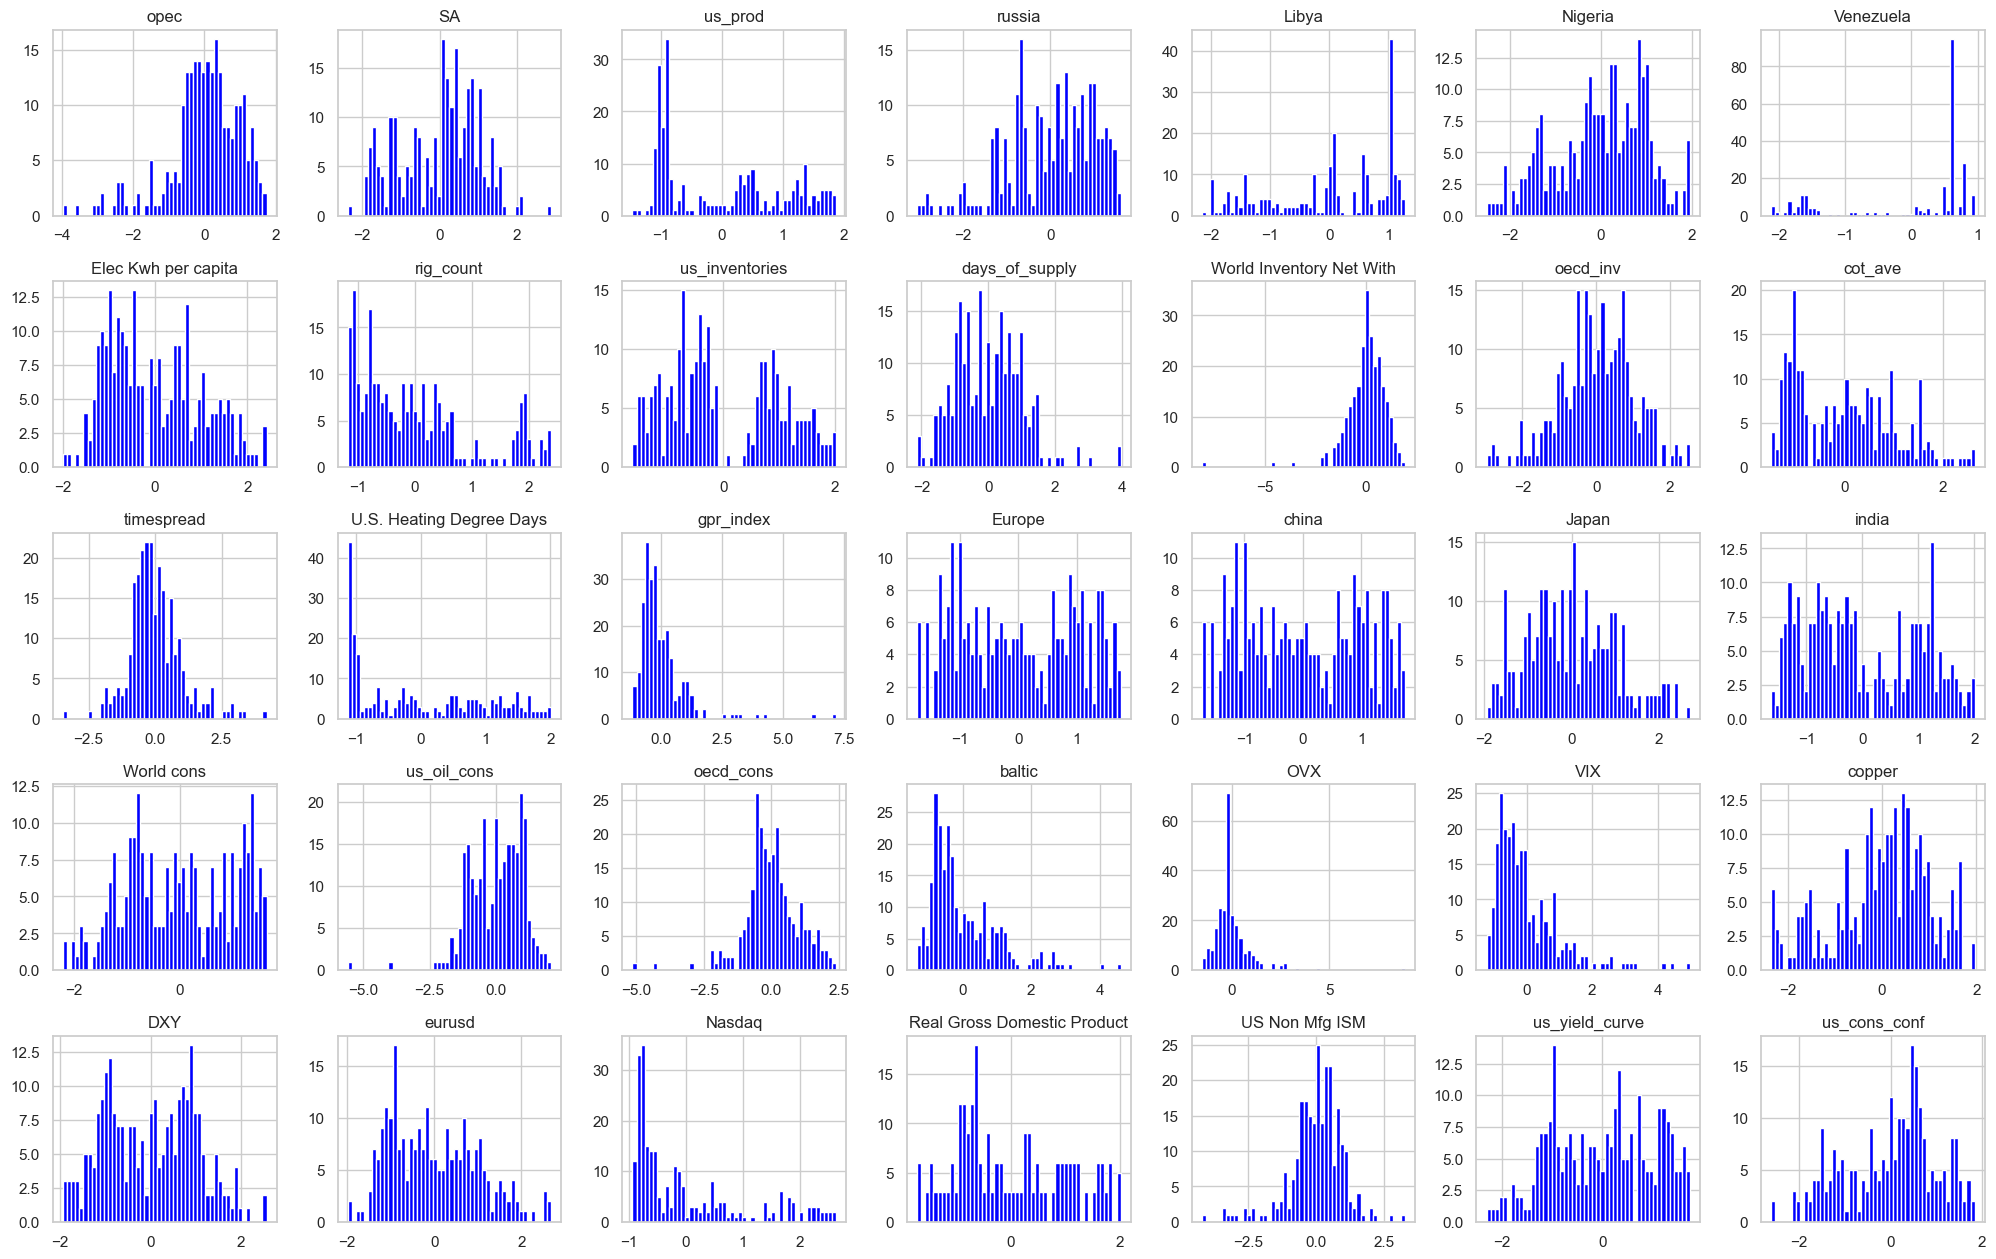

In [603]:
# Histograms
# Adjust the layout and figsize parameters as needed
scaled_data_standard.hist(bins=50, figsize=(20, 15), color='blue', layout=(6, 7), sharex=False)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

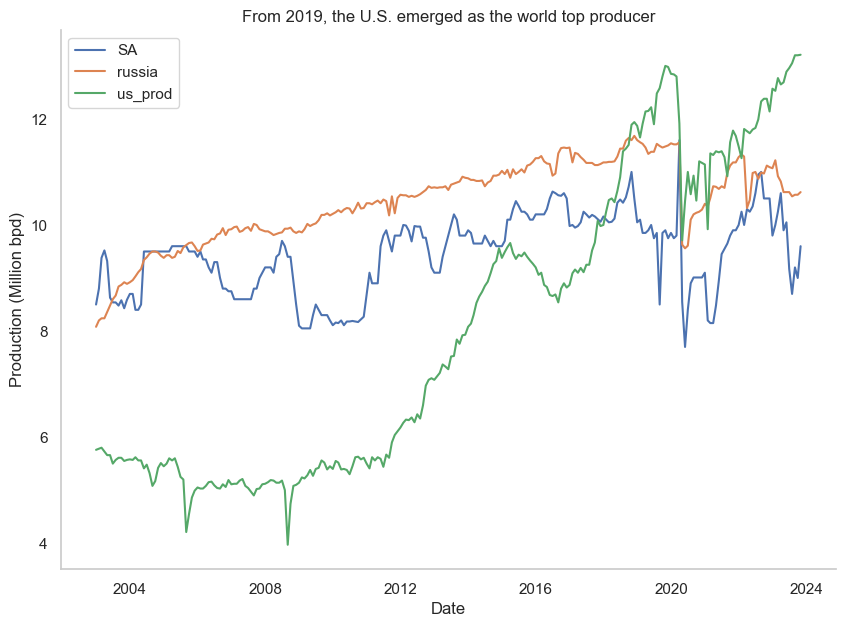

In [604]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('refined.csv')

# Convert the 'Date' column to datetime format if it's not already in datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'Date' column in ascending order
df.sort_values(by='Date', inplace=True)

# Set the style
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the lines using Seaborn
plot = sns.lineplot(x='Date', y='value', hue='variable', data=pd.melt(df[['Date', 'SA', 'russia', 'us_prod']], 'Date'))

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Production (Million bpd)')
plt.grid(False)
plt.title('From 2019, the U.S. emerged as the world top producer')

# Remove gridlines
sns.despine()

# Get the legend object
legend = plot.get_legend()

# Set an empty title for the legend
legend.set_title("")

# Show the plot
plt.show()


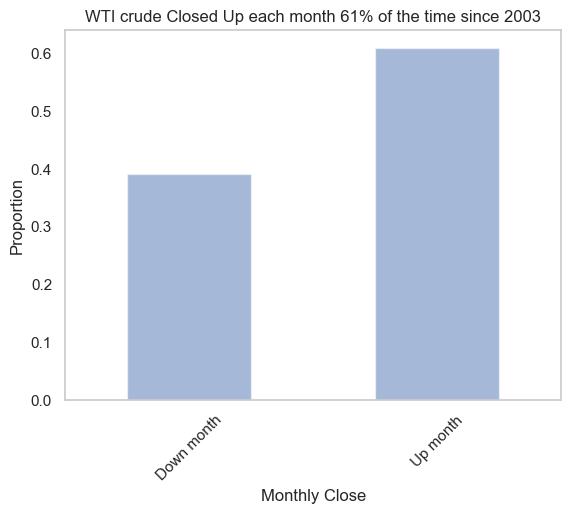

In [605]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame (clean csv file)
# Bar chart for the 'WTI' column with values 0 or 1
wti_counts = df['WTI'].value_counts(normalize=True).loc[[0, 1]]
wti_counts.plot(kind="bar", alpha=0.5, grid=False)

# Custom labels for x-axis
plt.xticks(range(len(wti_counts.index)), ['Down month', 'Up month'], rotation =45)

plt.title("WTI crude Closed Up each month 61% of the time since 2003")
plt.xlabel("Monthly Close")
plt.ylabel("Proportion")
plt.show()


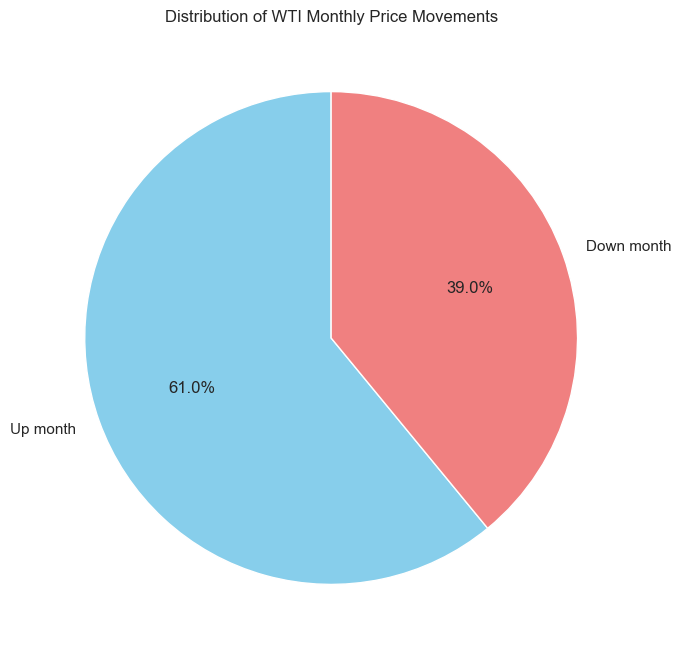

In [606]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))

# Assuming your 'WTI' column contains the class values 0 and 1
class_counts = df['WTI'].value_counts()

# Mapping class values to labels
labels = {0: 'Down month', 1: 'Up month'}
class_counts.index = class_counts.index.map(labels)

# Plotting the pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Set title
plt.title('Distribution of WTI Monthly Price Movements')

# Show the plot
plt.show()

Correlation Matrix

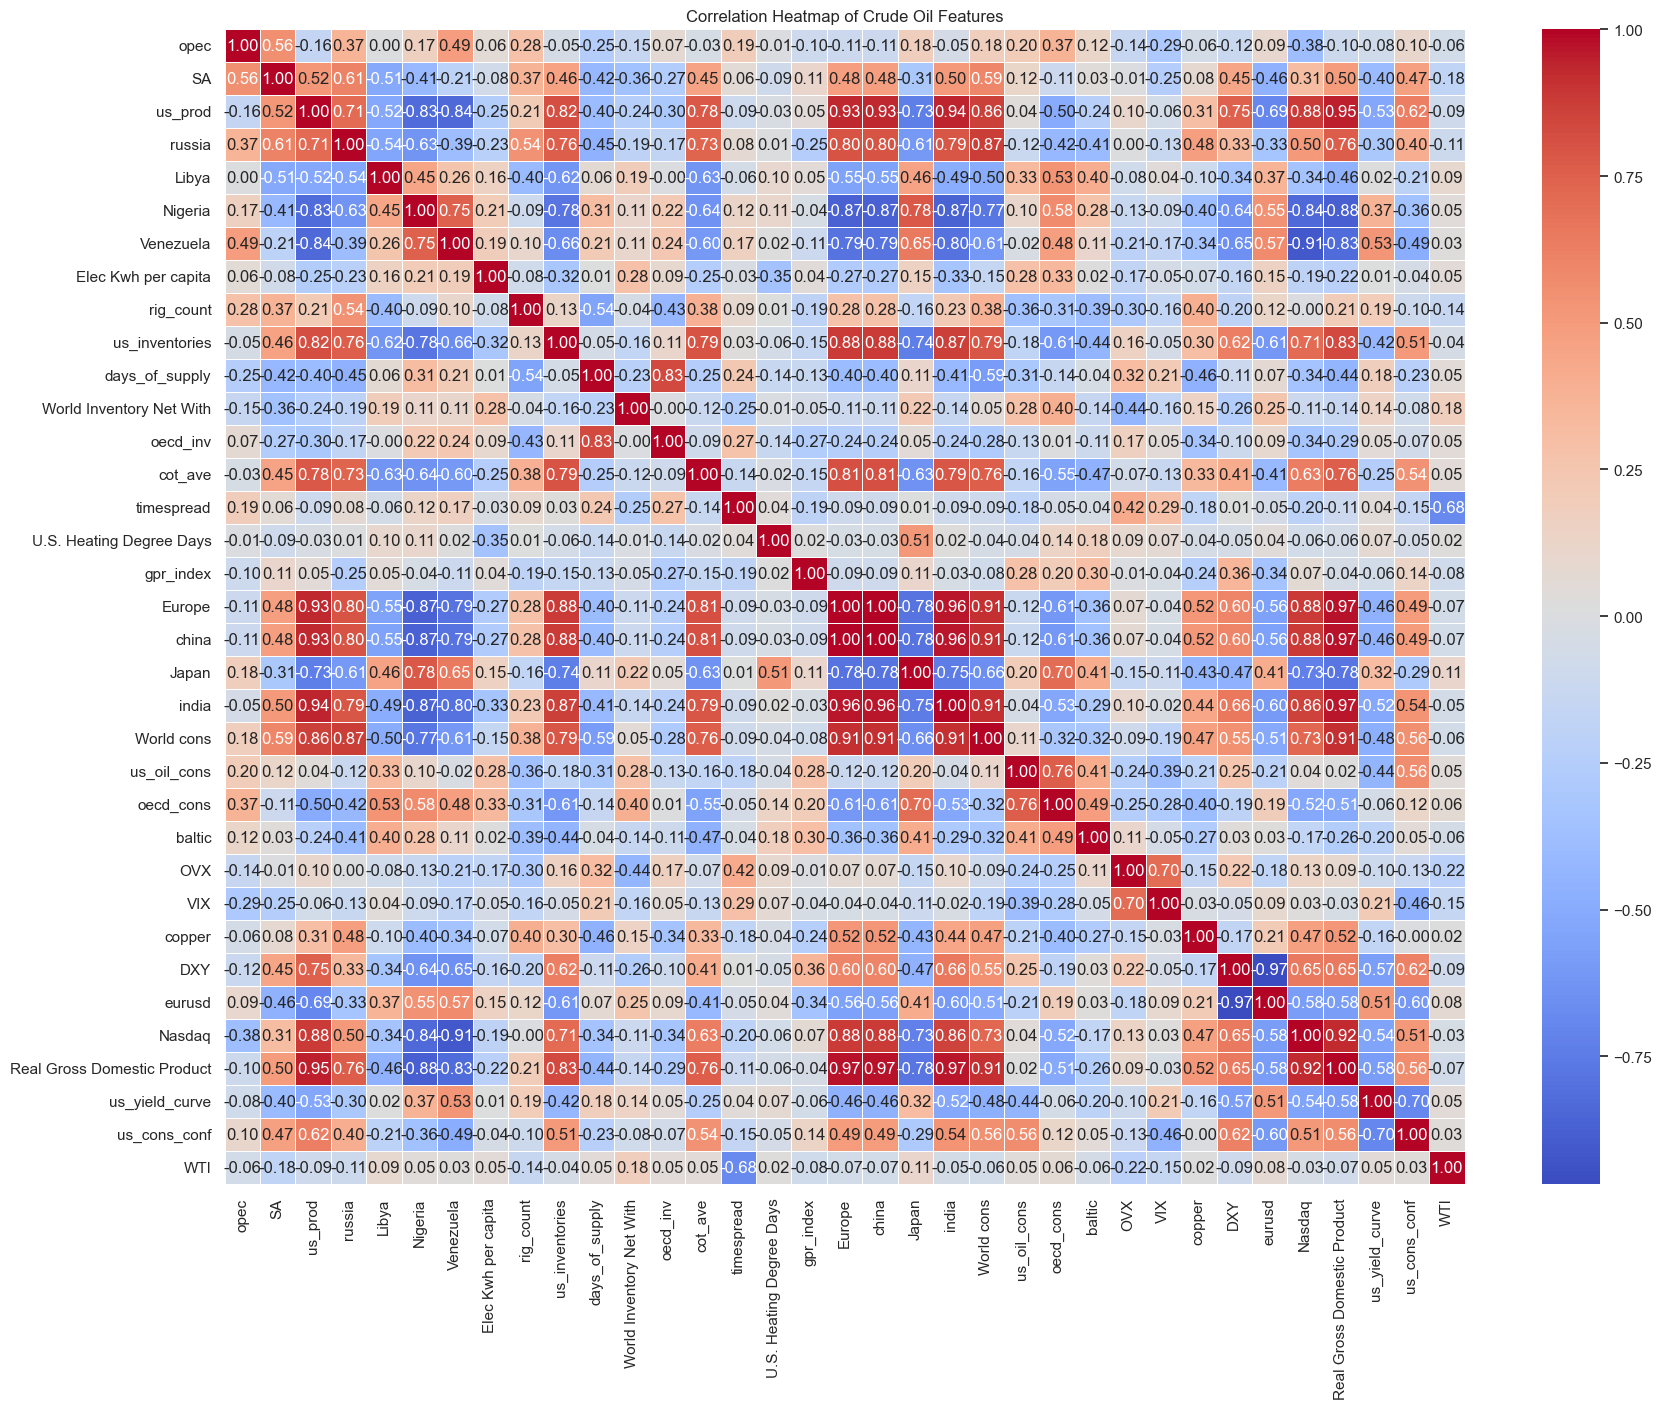

In [607]:
# Extract numeric columns
numeric_columns = df.drop(columns=['Date'])

# Standard Scaling
standard_scaler = StandardScaler()
scaled_data_standard = standard_scaler.fit_transform(numeric_columns)
scaled_data_standard = pd.DataFrame(scaled_data_standard, columns=numeric_columns.columns)

# Drop columns that are not needed for correlation analysis
# For example, dropping 'US Non Mfg ISM'
scaled_data_standard = scaled_data_standard.drop(columns=['US Non Mfg ISM'])

# Create a correlation matrix for the scaled data
correlation_matrix_scaled = scaled_data_standard.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix_scaled, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Crude Oil Features')

# Show the plot
plt.show()

In [608]:
# Check for NaN values in each column
nan_columns = scaled_data_standard.columns[scaled_data_standard.isnull().any()]

# Print columns with NaN values
print("Columns with NaN values:", nan_columns)

# Print the number of NaN values in each column
print("Number of NaN values in each column:")
print(scaled_data_standard[nan_columns].isnull().sum())

Columns with NaN values: Index([], dtype='object')
Number of NaN values in each column:
Series([], dtype: float64)


In [609]:
# correl vs target 
scaled_data_standard.corr()["WTI"].sort_values().round(3)

timespread                    -0.680
OVX                           -0.222
SA                            -0.184
VIX                           -0.150
rig_count                     -0.141
russia                        -0.106
us_prod                       -0.091
DXY                           -0.085
gpr_index                     -0.084
Real Gross Domestic Product   -0.069
Europe                        -0.067
china                         -0.067
World cons                    -0.065
opec                          -0.065
baltic                        -0.060
india                         -0.054
us_inventories                -0.044
Nasdaq                        -0.034
copper                         0.017
U.S. Heating Degree Days       0.025
Venezuela                      0.026
us_cons_conf                   0.033
us_oil_cons                    0.045
Nigeria                        0.045
oecd_inv                       0.047
days_of_supply                 0.049
Elec Kwh per capita            0.050
c

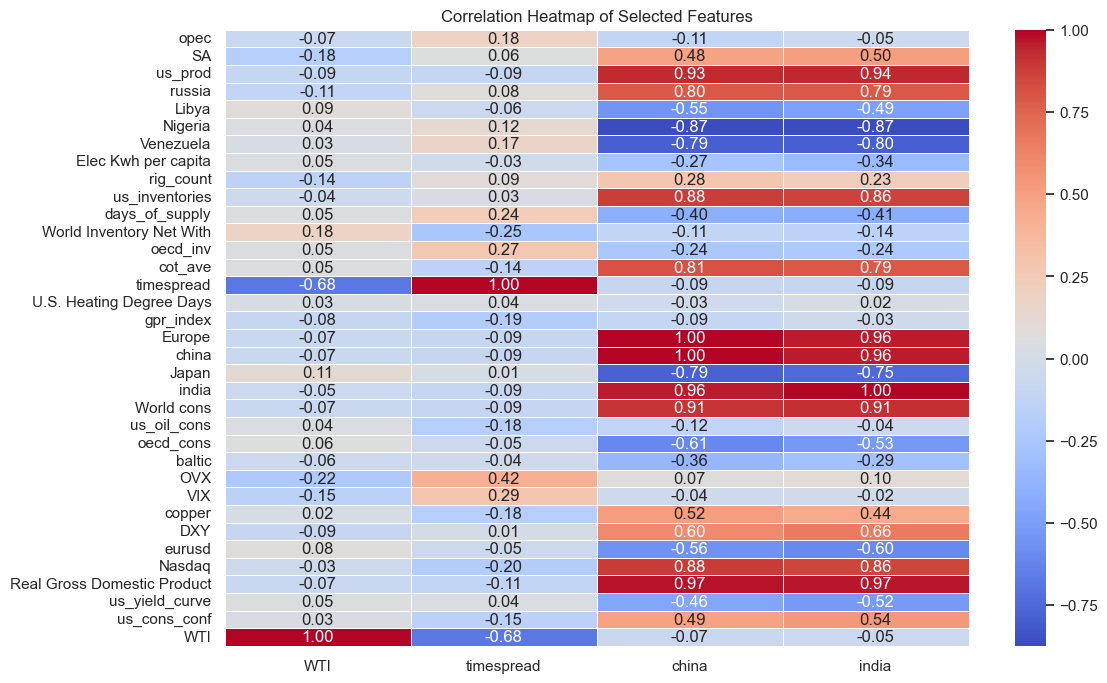

In [610]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables to analyze
variables_of_interest = ["WTI", "timespread", "china", "india"]

# Create an empty DataFrame
correlation_table = pd.DataFrame(index=scaled_data_standard.columns)

# Add columns with correlations for each variable
for variable in variables_of_interest:
    correlation_table[variable] = scaled_data_standard.corr()[variable].round(3)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

Let's do some feature importance to refine our selection using the Decision Tree Regressor

In [611]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming 'scaled_data_standard' is your DataFrame with the data

# Define independent variables (features)
X = scaled_data_standard.iloc[:, :-1]  # Exclude the last column ('WTI') as features

# Define the target variable
y = scaled_data_standard['WTI']  # 'WTI' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Access feature importances
feature_importances = model.feature_importances_

# Display feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance:.4f}')


Mean Squared Error: 0.99
Feature Importances:
opec: 0.0000
SA: 0.0190
us_prod: 0.0000
russia: 0.0000
Libya: 0.0000
Nigeria: 0.0000
Venezuela: 0.0000
Elec Kwh per capita: 0.0000
rig_count: 0.0608
us_inventories: 0.0174
days_of_supply: 0.0236
World Inventory Net With: 0.0093
oecd_inv: 0.0471
cot_ave: 0.0245
timespread: 0.6431
U.S. Heating Degree Days: 0.0000
gpr_index: 0.0000
Europe: 0.0000
china: 0.0000
Japan: 0.0000
india: 0.0243
World cons: 0.0000
us_oil_cons: 0.0000
oecd_cons: 0.0139
baltic: 0.0244
OVX: 0.0032
VIX: 0.0066
copper: 0.0202
DXY: 0.0487
eurusd: 0.0139
Nasdaq: 0.0000
Real Gross Domestic Product: 0.0000
us_yield_curve: 0.0000
us_cons_conf: 0.0000


In [612]:
import pandas as pd

# Exclude the first column (assuming it is the index column)
columns_to_exclude = [df.columns[0]]

# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Iterate through each numeric column in the DataFrame
for column in numeric_columns:
    # Check if the column is not in the exclusion list
    if column not in columns_to_exclude:
        # Calculate the median for the current column
        median_value = df[column].median()
        
        # Replace missing values with the median for the current column
        df[column] = df[column].fillna(median_value)

# Check for missing values after replacement
print("After Replacement:")
print(df.isnull().sum())


After Replacement:
Date                           0
opec                           0
SA                             0
us_prod                        0
russia                         0
Libya                          0
Nigeria                        0
Venezuela                      0
Elec Kwh per capita            0
rig_count                      0
us_inventories                 0
days_of_supply                 0
World Inventory Net With       0
oecd_inv                       0
cot_ave                        0
timespread                     0
U.S. Heating Degree Days       0
gpr_index                      0
Europe                         0
china                          0
Japan                          0
india                          0
World cons                     0
us_oil_cons                    0
oecd_cons                      0
baltic                         0
OVX                            0
VIX                            0
copper                         0
DXY                     

In [613]:
import pandas as pd

# Load the dataset
df = 'refined.csv'
df = pd.read_csv(df)

# Define the selected columns for your ML model
selected_columns = ['Date','opec', 'russia','us_prod', 'china', 'india','oecd_cons','us_oil_cons','days_of_supply',
                    'oecd_inv','rig_count','us_inventories','baltic', 'copper','eurusd','cot_ave','timespread',
                    'gpr_index','us_cons_conf','us_yield_curve','WTI']

# Select the specified columns
final_data = df[selected_columns]

# Save the new DataFrame to a CSV file
final_data.to_csv('final.csv', index=False)
final_data = pd.read_csv('final.csv')

# Classification Models

In [614]:
class_counts = df['WTI'].value_counts()
count_0 = class_counts[0]
# count_1 = class_counts[1]
print(class_counts)

WTI
1    153
0     98
Name: count, dtype: int64


Setting models features and Target

In [615]:
# Selecting key variables related to supply, demand, balance, financial markets, and macroeconomic variables
selected_columns = ['opec', 'russia','us_prod', 'china', 'india','oecd_cons','us_oil_cons','days_of_supply',
                    'oecd_inv','rig_count','us_inventories','baltic', 'copper','eurusd','cot_ave','timespread',
                    'gpr_index','us_cons_conf','us_yield_curve']

# Define our features (X) and the target variable (y)
X = scaled_data_standard[selected_columns]
y = pd.cut(scaled_data_standard['WTI'], bins=[-float('inf'), 0, float('inf')], labels=[0, 1], include_lowest=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [616]:
X_train.shape

(200, 19)

In [617]:
X_test.shape

(51, 19)

Logsitic regression

In [618]:
# Create and fit the model
logr_model = LogisticRegression(random_state=0, max_iter=1000)
logr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [619]:
# Make predictions on the test data
logr_y_pred = logr_model.predict(X_test)

# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, logr_y_pred), 4)
print("Logistic Regression Accuracy:", accuracy)
print()

# Print the model's classification report
print(classification_report(y_test, logr_y_pred))

Logistic Regression Accuracy: 0.9608

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.94      1.00      0.97        33

    accuracy                           0.96        51
   macro avg       0.97      0.94      0.96        51
weighted avg       0.96      0.96      0.96        51



Confusion Matrix:
[[16  2]
 [ 0 33]]

Accuracy from Logistic regression confusion matrix: 0.9608


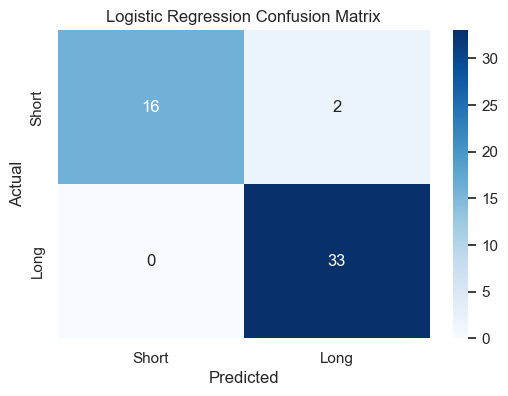

In [620]:
# LOGISTIC REGRESSION PERFORMANCE METRICS
# Create a confusion matrix
confusion = confusion_matrix(y_test, logr_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print()
print("Accuracy from Logistic regression confusion matrix:", accuracy_from_confusion)

cm_logr = confusion_matrix(y_test, logr_y_pred)
class_names = ["Short", "Long"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_logr, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Naive Bayes

In [621]:
# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

Naive Bayes Accuracy: 0.9216
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.91      0.97      0.94        33

    accuracy                           0.92        51
   macro avg       0.93      0.90      0.91        51
weighted avg       0.92      0.92      0.92        51

Confusion Matrix:
[[15  3]
 [ 1 32]]

Accuracy from Naive Bayes confusion matrix: 0.9216


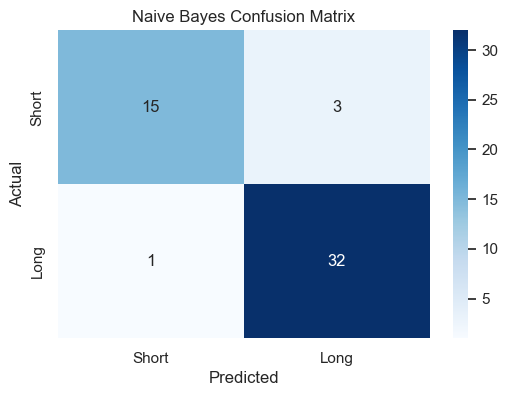

In [622]:
# Make predictions on the test data
nb_y_pred = nb_model.predict(X_test)

# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, nb_y_pred), 4)
print("Naive Bayes Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, nb_y_pred))

# Create a confusion matrix
confusion = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print()
print("Accuracy from Naive Bayes confusion matrix:", accuracy_from_confusion)

# create a visual for confusion matrix
cm_nb = confusion_matrix(y_test, nb_y_pred)
class_names = ["Short", "Long"]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

KNN

In [623]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-nearest neighbors model
knn_model = KNeighborsClassifier(n_neighbors = 3)
# Train the model on the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        18
           1       0.83      0.91      0.87        33

    accuracy                           0.82        51
   macro avg       0.82      0.79      0.80        51
weighted avg       0.82      0.82      0.82        51

Confusion Matrix:
[[12  6]
 [ 3 30]]

Accuracy from KNN confusion matrix: 0.8235


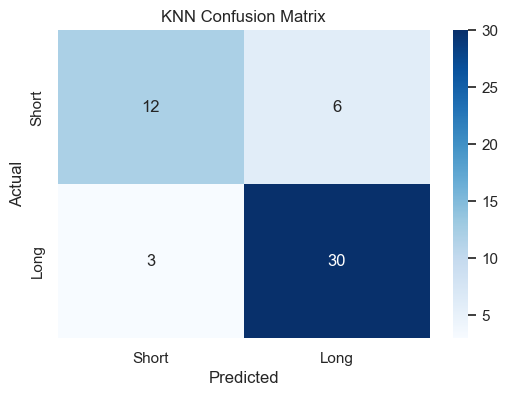

In [624]:
# Make predictions on the test data
knn_y_pred = knn_model.predict(X_test)

# KNN PERFORMANCE METRICS
# Print the model's classification report
print(classification_report(y_test, knn_y_pred))

# Create a confusion matrix
confusion = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print()
print("Accuracy from KNN confusion matrix:", accuracy_from_confusion)

# create a visual for confusion matrix
cm_knn = confusion_matrix(y_test, knn_y_pred)
class_names = ["Short", "Long"]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

Text(0, 0.5, 'Error rate')

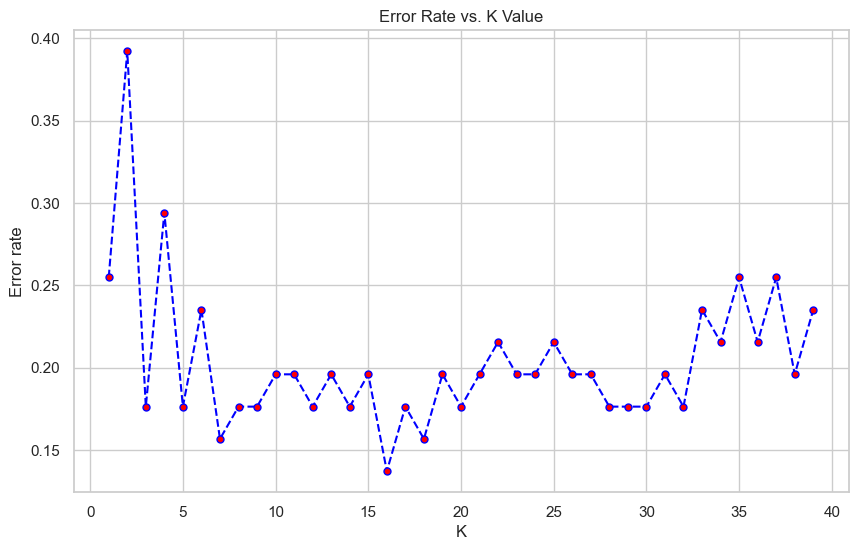

In [625]:
# Error rate
error_rate = []
for x in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= x)
    knn.fit(X_train, y_train)
    pred_x = knn.predict(X_test)
    error_rate.append(np.mean(pred_x != y_test)) # ave of my where my pred != actual test values

#plot the error rate
plt.figure(figsize= (10,6))
plt.plot(range(1,40), error_rate, color = "blue", linestyle = "dashed", marker = "o", 
         markerfacecolor = "red", markersize = 5)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel ("Error rate")

Support Vector Models

In [626]:
#Create a SVM Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [627]:
#Predict the response for test dataset
svm_y_pred = svm_model.predict(X_test)

accuracy = round(accuracy_score(y_test, svm_y_pred),4)
print("SVM:", accuracy)
print()
print(classification_report(y_test, svm_y_pred))

# #Calculate the accuracy of our model
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# print()
# print(classification_report(y_test, svm_y_pred))

SVM: 0.9412

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.94      0.97      0.96        33

    accuracy                           0.94        51
   macro avg       0.94      0.93      0.93        51
weighted avg       0.94      0.94      0.94        51



SVM Accuracy: 0.9412
Confusion Matrix:
[[16  2]
 [ 1 32]]
Accuracy from KNN confusion matrix: 0.9412


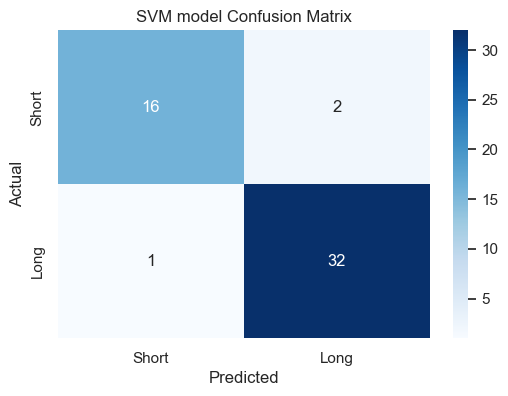

In [628]:
# SVM PERFORMANCE METRICS
# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, svm_y_pred), 4)
print("SVM Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, svm_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print("Accuracy from KNN confusion matrix:", accuracy_from_confusion)

cm_svm = confusion_matrix(y_test, svm_y_pred)
class_names = ["Short", "Long"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("SVM model Confusion Matrix")
plt.show()

Random Forest

In [629]:
# Create an instance of the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 200)

# Fit the random forest model on the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [630]:
# Predict using the random forest model
rf_y_pred = random_forest.predict(X_test)

print(classification_report(y_test, rf_y_pred))

# RANDOM FOREST PERFORMANCE METRICS

# Create a confusion matrix
confusion = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)
print()
print("Accuracy from Random forest confusion matrix:", accuracy_from_confusion)
cm_rf = confusion_matrix(y_test, rf_y_pred)
class_names = ["Short", "Long"]

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.89      0.97      0.93        33

    accuracy                           0.90        51
   macro avg       0.91      0.87      0.89        51
weighted avg       0.90      0.90      0.90        51

Confusion Matrix:
[[14  4]
 [ 1 32]]

Accuracy from Random forest confusion matrix: 0.902


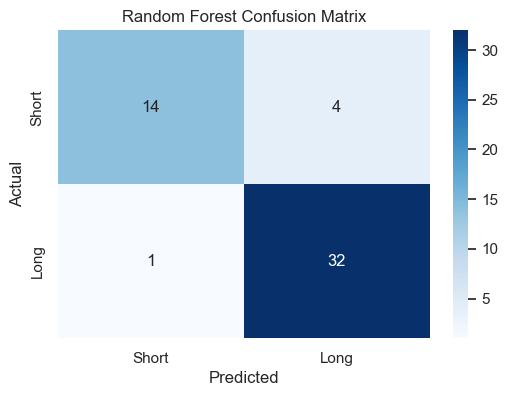

In [631]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [632]:
# For Random Forest Model
feature_importance = random_forest.feature_importances_
feature_names = selected_columns

# Display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
           Feature  Importance
15      timespread    0.437499
14         cot_ave    0.045876
9        rig_count    0.039703
13          eurusd    0.039289
2          us_prod    0.039241
16       gpr_index    0.037008
8         oecd_inv    0.035993
11          baltic    0.032267
6      us_oil_cons    0.031255
12          copper    0.030361
10  us_inventories    0.028908
17    us_cons_conf    0.027855
7   days_of_supply    0.027633
18  us_yield_curve    0.027180
0             opec    0.026674
5        oecd_cons    0.024865
1           russia    0.023956
3            china    0.022628
4            india    0.021809


Decision Tree Classifier

In [633]:
# Create a Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [634]:
# Make predictions on the test data
dtree_y_pred = dtree.predict(X_test)

# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, dtree_y_pred), 4)
print("Decision Tree Accuracy:", accuracy)

# print the classification report
print(classification_report(y_test, dtree_y_pred))
print()
# Create a confusion matrix
confusion = confusion_matrix(y_test, dtree_y_pred)
print("Confusion Matrix:")
print(confusion)

# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(dtree_y_pred), 4)
print("Accuracy from confusion matrix:", accuracy_from_confusion)

# Create default Decision Tree classifer object
decisionTree_model_gini = DecisionTreeClassifier()

# Use entropy criterion
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use max depth of 3
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)

# Fit the trees
decisionTree_model_gini.fit(X_train,y_train)
decisionTree_model_entropy.fit(X_train,y_train)
decisionTree_model_depth3.fit(X_train,y_train)

# Make prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth3.predict(X_test)

print("Accuracy (gini):",metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (entropy):",metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (depth3):",metrics.accuracy_score(y_test, y_pred_depth3))


Decision Tree Accuracy: 0.7647
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        18
           1       0.86      0.76      0.81        33

    accuracy                           0.76        51
   macro avg       0.75      0.77      0.75        51
weighted avg       0.78      0.76      0.77        51


Confusion Matrix:
[[14  4]
 [ 8 25]]
Accuracy from confusion matrix: 0.7647
Accuracy (gini): 0.8235294117647058
Accuracy (entropy): 0.9019607843137255
Accuracy (depth3): 0.7843137254901961


Decision Tree Accuracy: 0.7647
Confusion Matrix:
[[14  4]
 [ 8 25]]


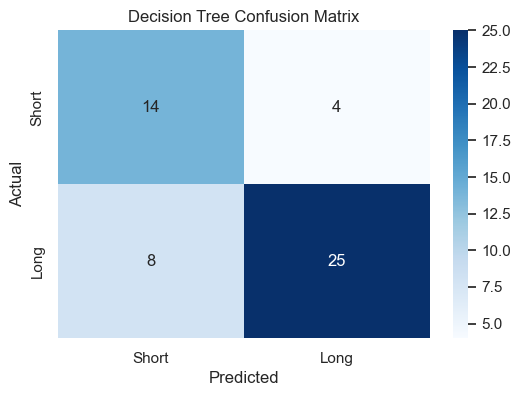

In [635]:
# DECISION TREE PERFORMANCE METRICS
# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, dtree_y_pred), 4)
print("Decision Tree Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, dtree_y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion = round((confusion[0][0] + confusion[1][1]) / len(y_test),4)

cm_dtree = confusion_matrix(y_test, dtree_y_pred)
class_names = ["Short", "Long"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dtree, annot= True, fmt= "d", cmap= "Blues", xticklabels= class_names, yticklabels= class_names)
plt.xlabel( "Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Artificial Neural Network

In [636]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Choose the scaled data (either scaled_data_standard_minmax or scaled_data_standard)
X = scaled_data_standard[selected_columns]
y = scaled_data_standard['WTI']

# Encode the target variable for ANN
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# We choose the Sequential Model
model = Sequential()
# Input Layer
model.add(Dense(16, input_dim=len(selected_columns), activation='relu'))
# Hidden Layer
model.add(Dense(8, activation='relu'))
# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 2s 55ms/step - loss: 0.6610 - accuracy: 0.5550 - val_loss: 0.6725 - val_accuracy: 0.5686
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6414 - accuracy: 0.6000 - val_loss: 0.6577 - val_accuracy: 0.5686
Epoch 3/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6278 - accuracy: 0.6750 - val_loss: 0.6462 - val_accuracy: 0.6275
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6157 - accuracy: 0.7050 - val_loss: 0.6381 - val_accuracy: 0.6667
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6035 - accuracy: 0.7300 - val_loss: 0.6291 - val_accuracy: 0.6863
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5928 - accuracy: 0.7550 - val_loss: 0.6226 - val_accuracy: 0.7255
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5823 - accuracy: 0.7700 - val_loss: 0.6148 - val_accuracy: 0.7451
Epoch 8/50
7/7 [===========

In [637]:
# Evaluate the model
# Save the model in the HDF5 format
model.save('wti_prediction.h5', save_format='h5')

_, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")


print(model.summary())

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate and print the model's accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print("ANN Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred_binary))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)


2/2 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.9216


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Accuracy: 0.9216
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                320       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 465 (1.82 KB)
Trainable params: 465 (1.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
5/5 [==============================] - 2s 85ms/step - loss: 0.1941 - accuracy: 0.9500 - val_loss: 0.1812 - val_accuracy: 0.9250
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1867 - accuracy: 0.9625 - val_loss: 0.1826 - val_acc

In [638]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 3ms/step


In [639]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions (0 or 1)

# Calculate and print the model's accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("ANN Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 5ms/step
ANN Accuracy: 0.9019607843137255
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.94      0.91      0.92        33

    accuracy                           0.90        51
   macro avg       0.89      0.90      0.89        51
weighted avg       0.90      0.90      0.90        51



In [640]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16  2]
 [ 3 30]]


0.9019607843137255

Confusion Matrix:
[[16  2]
 [ 3 30]]

Accuracy from ANN confusion matrix: 0.902


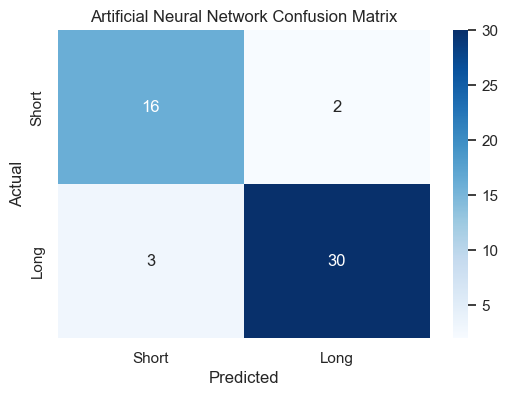

In [641]:
# ARTIFICIAL NEURAL NETWORK PERFORMANCE METRICS

# Create a confusion matrix
confusion_ann = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_ann)

# Calculate and print the accuracy based on the confusion matrix
accuracy_from_confusion_ann = round((confusion_ann[0][0] + confusion_ann[1][1]) / len(y_test), 4)
print()
print("Accuracy from ANN confusion matrix:", accuracy_from_confusion_ann)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_ann, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Artificial Neural Network Confusion Matrix")
plt.show()

In [642]:
acc = history.history['accuracy']
loss = history.history['loss']

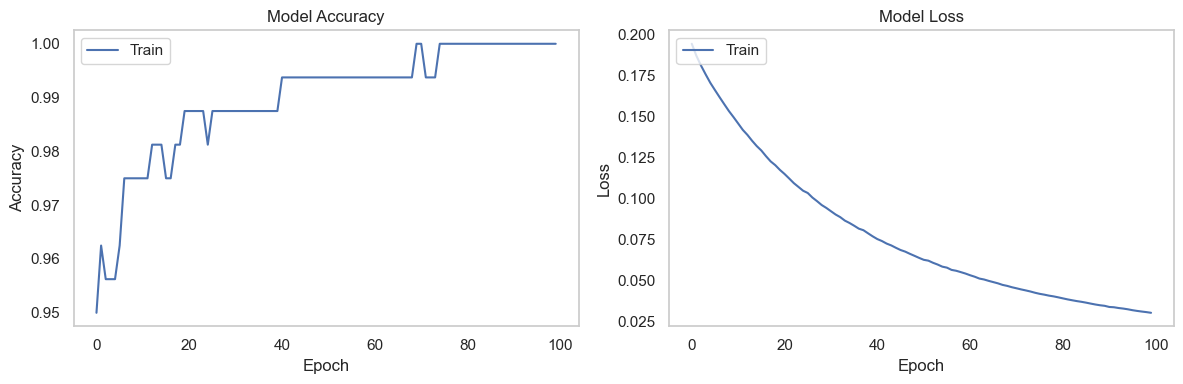

In [643]:
from matplotlib import pyplot as plt

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first chart in the first subplot (1x2, subplot 1)
axes[0].plot(history.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train'], loc='upper left')
axes[0].grid(False)

# Plot the second chart in the second subplot (1x2, subplot 2)
axes[1].plot(history.history['loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'], loc='upper left')
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show the combined canvas with both charts
plt.show()


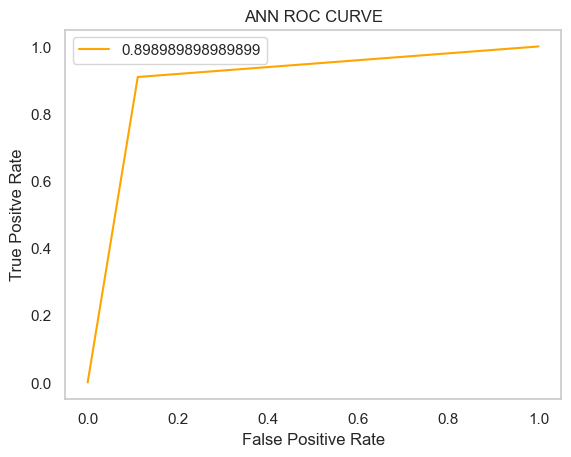

In [644]:
# Receiver Operating characteristic (ROC)

auc_ann = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color = 'orange', label = auc_ann)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('ANN ROC CURVE')
plt.grid(False)
plt.legend()

plt.show()

# KMeans Clustering Model

Kmeans can find patterns in my data that i did not know were there

Find the number of clusters K: the elbow method

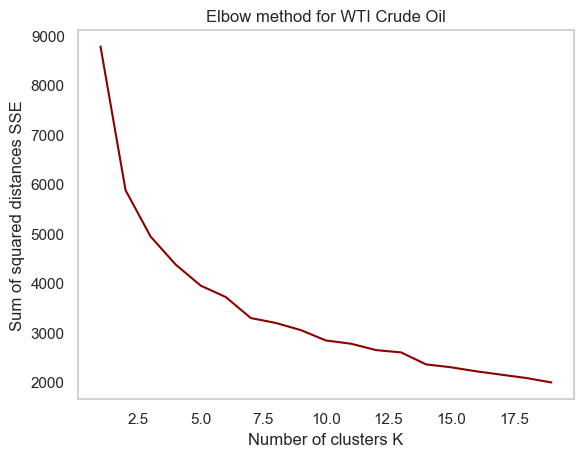

In [645]:
# To find the optimal number of clusters let's use the Elbow method 
elb_plot = []
for x in range(1,20):
    kmeans = KMeans(n_clusters = x, init = 'k-means++', random_state=42, n_init="auto")
    kmeans.fit(scaled_data_standard)
    elb_plot.append(kmeans.inertia_)

plt.plot(range(1,20), elb_plot, color = 'darkred')
plt.title("Elbow method for WTI Crude Oil")

plt.xlabel("Number of clusters K")
plt.ylabel("Sum of squared distances SSE")
plt.grid(False)
plt.show()

Fit KMeans Model

In [646]:
k = 5  # Set the number of clusters based on the elbow method 
kmeans = KMeans(n_clusters=k, random_state=0)
red_y_pred = kmeans.fit_predict(scaled_data_standard)
# should i write single_file['cluster'] instead of red_y_pred
red_y_pred

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4])

In [647]:
scaled_data_standard['clusters'] = red_y_pred
scaled_data_standard

,opec,SA,us_prod,russia,Libya,Nigeria,Venezuela,Elec Kwh per capita,rig_count,us_inventories,...,VIX,copper,DXY,eurusd,Nasdaq,Real Gross Domestic Product,us_yield_curve,us_cons_conf,WTI,clusters
0,-2.252488,-1.291566,-0.816800,-3.036497,0.439636,0.685495,-1.228984,0.595732,-1.179345,-1.563317,...,1.445245,-2.261228,1.203298,-1.225693,-0.941175,-1.715093,1.171409,-0.426002,0.800327,0
1,-1.507155,-0.888069,-0.809601,-2.881843,0.497290,1.052600,-1.737510,0.883042,-1.127974,-1.630561,...,1.255450,-2.278845,1.180963,-1.203054,-0.934951,-1.715093,1.074418,-0.500599,0.800327,0
2,-1.154403,-0.107974,-0.802403,-2.830292,0.535725,1.222034,-0.653546,-0.489660,-1.083941,-1.526175,...,1.196294,-2.347179,1.108375,-1.104692,-0.932872,-1.715093,1.204782,-1.050259,-1.249490,0
3,-1.620947,0.080324,-0.827597,-2.830292,0.554943,0.261913,0.577624,-0.840817,-1.049694,-1.413583,...,0.217743,-2.332231,0.899546,-0.902503,-0.912493,-1.654289,1.260056,-1.183748,-1.249490,0
4,-1.507155,-0.188674,-0.852791,-2.675638,0.593379,0.064241,0.805123,-0.713124,-1.093726,-1.481842,...,0.003300,-2.275642,0.461786,-0.430991,-0.891082,-1.654289,0.915896,-0.414224,-1.249490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,-1.051991,-0.390422,1.774613,0.237013,0.055280,-1.573613,-1.550158,1.425739,-0.195953,0.977634,...,-0.716441,1.166686,1.421061,-1.050827,2.503570,1.940656,-2.152347,0.999188,0.800327,4
247,-1.205609,-1.022568,1.807005,0.133910,0.016844,-1.912479,-1.510011,1.617278,-0.227754,0.674186,...,-0.723835,0.968090,1.617606,-1.169486,2.443897,1.973397,-1.984439,0.571238,0.800327,4
248,-0.841477,-0.350073,1.860993,0.172574,0.074498,-1.714807,-1.550158,0.723426,-0.222862,-0.312625,...,-0.237025,0.877868,1.907958,-1.381042,2.260670,1.996784,-1.688252,0.449528,0.800327,4
249,-0.881304,-0.619071,1.860993,0.172574,0.074498,-1.460658,-1.590305,-1.032357,-0.222862,-0.312625,...,-0.160614,0.783375,1.957094,-1.376358,2.189448,2.005203,-1.358692,0.433823,-1.249490,4


In [648]:
# let's look at the centroids
kmeans.cluster_centers_

array([[-0.10458707, -0.53208031, -0.98892191, -1.31929702,  0.90117384,
         1.13094052,  0.66568791,  0.41449026, -0.96257581, -1.11681337,
         0.5267965 ,  0.20539217,  0.24692416, -1.08110406, -0.14961302,
         0.07640473,  0.48797734, -1.24436061, -1.24436061,  1.16070101,
        -1.17209557, -1.17441145,  0.91742658,  1.22542703,  0.94929975,
        -0.19926746, -0.37935063, -0.89750008, -0.25661736,  0.22670742,
        -0.80152615, -1.0983279 , -0.15673783,  0.19261873,  0.17215718],
       [-2.42361217, -0.67700891,  1.05865201, -0.14466525, -1.27961919,
        -0.91543044, -1.92383263, -0.6247206 , -0.79810661,  1.70856371,
         2.10953263, -0.62251582,  1.51253755,  1.53583335,  0.11880146,
         0.01997424, -0.8252107 ,  1.22249488,  1.22249488, -1.22299993,
         0.90174415, -0.04304652, -1.87976469, -2.43868965, -0.79449487,
         1.59717053,  1.25033099,  0.20200151,  0.55808247, -0.53691883,
         1.44995546,  0.96425959, -0.43860448,  0.

In [649]:
from sklearn.decomposition import PCA

# Assuming i have performed clustering and assigned cluster labels to my data
clustered_data = scaled_data_standard

# Fit the KMeans model to get cluster centroids
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data_standard)

# Perform PCA on the cluster centroids to reduce dimensionality to 2D
pca = PCA(n_components=2)
centroids_2d = pca.fit_transform(kmeans.cluster_centers_)

# Centroid coordinates in 2D are stored in the 'centroids_2d' variable
print("Cluster Centroid Coordinates in 2D:")
print(centroids_2d)


Cluster Centroid Coordinates in 2D:
[[ 6.04134032  0.16826076]
 [-1.25221328 -1.88656486]
 [ 3.06555704  0.1721232 ]
 [-4.21425652 -3.00124972]
 [-3.64042757  4.54743061]]


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [650]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data_standard)
scaled_data_standard['PCA1'] = principal_components[:, 0]
scaled_data_standard['PCA2'] = principal_components[:, 1]

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


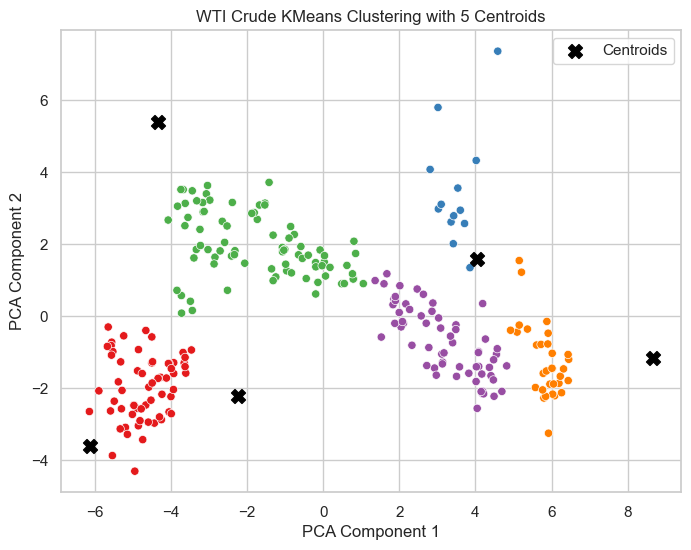

In [651]:
# Assuming I alrefined performed clustering and assigned cluster labels to my data
clustered_data = scaled_data_standard

# Fit the KMeans model to get cluster centroids
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data_standard)

# Extract the cluster centroids
pca = PCA(n_components=2)
centroids = pca.fit_transform(kmeans.cluster_centers_)

# Plot the clusters and centroids in a 2D space using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='clusters', data = clustered_data, palette='Set1', legend=False)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Centroids')
plt.title('WTI Crude KMeans Clustering with 5 Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# Model evaluation

In [652]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print('Within Cluster Sum of squares: ', kmeans.inertia_)

silhouette_avg = round(silhouette_score(scaled_data_standard, scaled_data_standard['clusters']),3)
print("Silhouette Score:", silhouette_avg)

db_index = round(davies_bouldin_score(scaled_data_standard, scaled_data_standard['clusters']),3)
print("Davies-Bouldin Index:", db_index)

inertia = round(kmeans.inertia_,3)
print("Within Cluster Sum of squares:", inertia)

Within Cluster Sum of squares:  4416.132251242023
Silhouette Score: 0.327
Davies-Bouldin Index: 1.162
Within Cluster Sum of squares: 4416.132


In [653]:
# Initialize an empty list to score metric dictionaries
metrics_list = []

# Fit KMeans for different values of k and calculate metrics for each cluster
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clustered_data['cluster'] = kmeans.fit_predict(scaled_data_standard)
    
    silhouette_avg = silhouette_score(scaled_data_standard, clustered_data['cluster'])
    db_index = davies_bouldin_score(scaled_data_standard, clustered_data['cluster'])
    inertia = kmeans.inertia_
    
    # Create a dictionary for the current cluster
    metric_dict = {'Cluster': k, 'Silhouette Score': silhouette_avg, 'Davies-Bouldin Index': db_index, 
                   'Inertia': inertia}
    
    # Append the metric dictionary to the list
    metrics_list.append(metric_dict)

# Create a DataFrame from the list of metric dictionaries
metrics_df = pd.DataFrame(metrics_list)

# Display the table of metrics
print(metrics_df)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

   Cluster  Silhouette Score  Davies-Bouldin Index      Inertia
0        2          0.383955              1.071588  7823.530024
1        3          0.360109              1.062315  5919.081483
2        4          0.327579              1.296676  5103.502140
3        5          0.324806              1.290931  4521.025680
4        6          0.355094              1.076805  3868.921639
5        7          0.318945              1.212331  3587.613604


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

In [654]:
for x in range(2,10):
    kmeans = KMeans(n_clusters= x, max_iter= 100)
    kmeans.fit(scaled_data_standard)
    score = silhouette_score(scaled_data_standard, kmeans.labels_)
    rd = round(score, 3)
    print(f"For cluster: {x}, the silhouette score is: {rd}", )

For cluster: 2, the silhouette score is: 0.373
For cluster: 3, the silhouette score is: 0.337
For cluster: 4, the silhouette score is: 0.315
For cluster: 5, the silhouette score is: 0.32


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

For cluster: 6, the silhouette score is: 0.331
For cluster: 7, the silhouette score is: 0.319
For cluster: 8, the silhouette score is: 0.305
For cluster: 9, the silhouette score is: 0.294


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

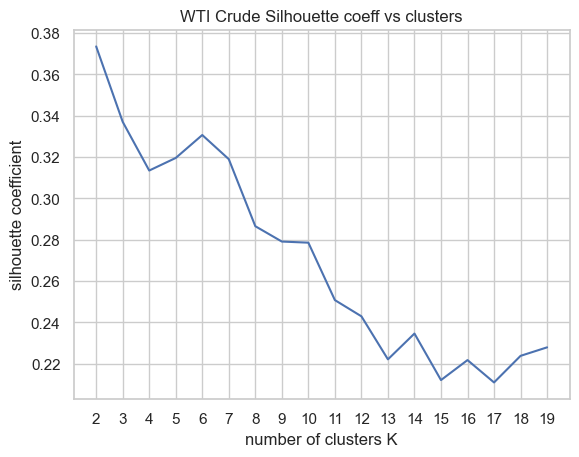

In [655]:
silhouette_coefficients = []
for x in range(2,20):
    kmeans = KMeans(n_clusters= x, max_iter= 100)
    kmeans.fit(scaled_data_standard)
    score = silhouette_score(scaled_data_standard, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,20), silhouette_coefficients)
plt.xticks(range(2,20))
plt.title('WTI Crude Silhouette coeff vs clusters')
plt.xlabel("number of clusters K")
plt.ylabel("silhouette coefficient")
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

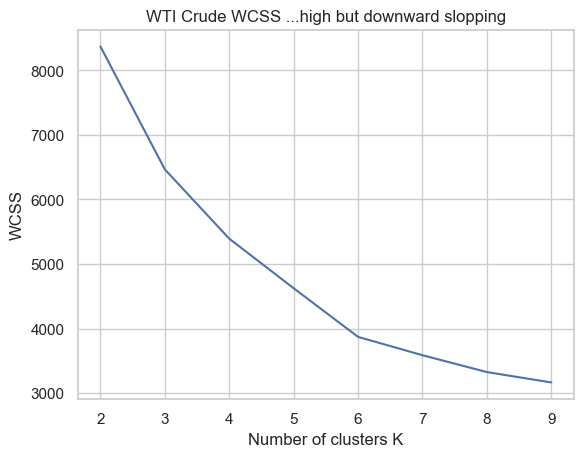

In [656]:
wcss = []

for x in range(2, 10):
    kmeans = KMeans(n_clusters=x, max_iter=100)
    kmeans.fit(scaled_data_standard)
    
    # Calculate the WCSS for this number of clusters
    wcss.append(kmeans.inertia_)  # Use 'inertia_' to get WCSS

plt.plot(range(2, 10), wcss)
plt.xticks(range(2, 10))
plt.xlabel("Number of clusters K")
plt.ylabel("WCSS")
plt.title("WTI Crude WCSS ...high but downward slopping")
plt.show()


In [657]:
df.shape

(251, 37)

Test for stationarity

In [658]:
from statsmodels.tsa.stattools import adfuller

# Load the data (use the original, unscaled data for this)
data = df['WTI']

# Test for stationarity
result = adfuller(data)

# Print the results
print("Dickey-Fuller Test Results:")
print("Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])


Dickey-Fuller Test Results:
Test Statistic: -10.079957212034094
p-value: 1.1958448306046034e-17
Critical Values: {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}
